In [1]:
#导入需要的包
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import datetime
%matplotlib inline

#导入数据
df_train_data=pd.read_csv('data/used_car_train_20200313.csv',sep=' ')
df_test_data=pd.read_csv('data/used_car_testB_20200421.csv',sep=' ')
print(df_train_data.shape)
print(df_test_data.shape)

(150000, 31)
(50000, 30)


In [73]:
#数据备份
df_train=df_train_data.copy()
#查看总体数据
df_train.head(5)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [14]:
#查看训练集的变量数据类型
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [15]:
#查看唯一的字符串类型变量的数值分布
df_train['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

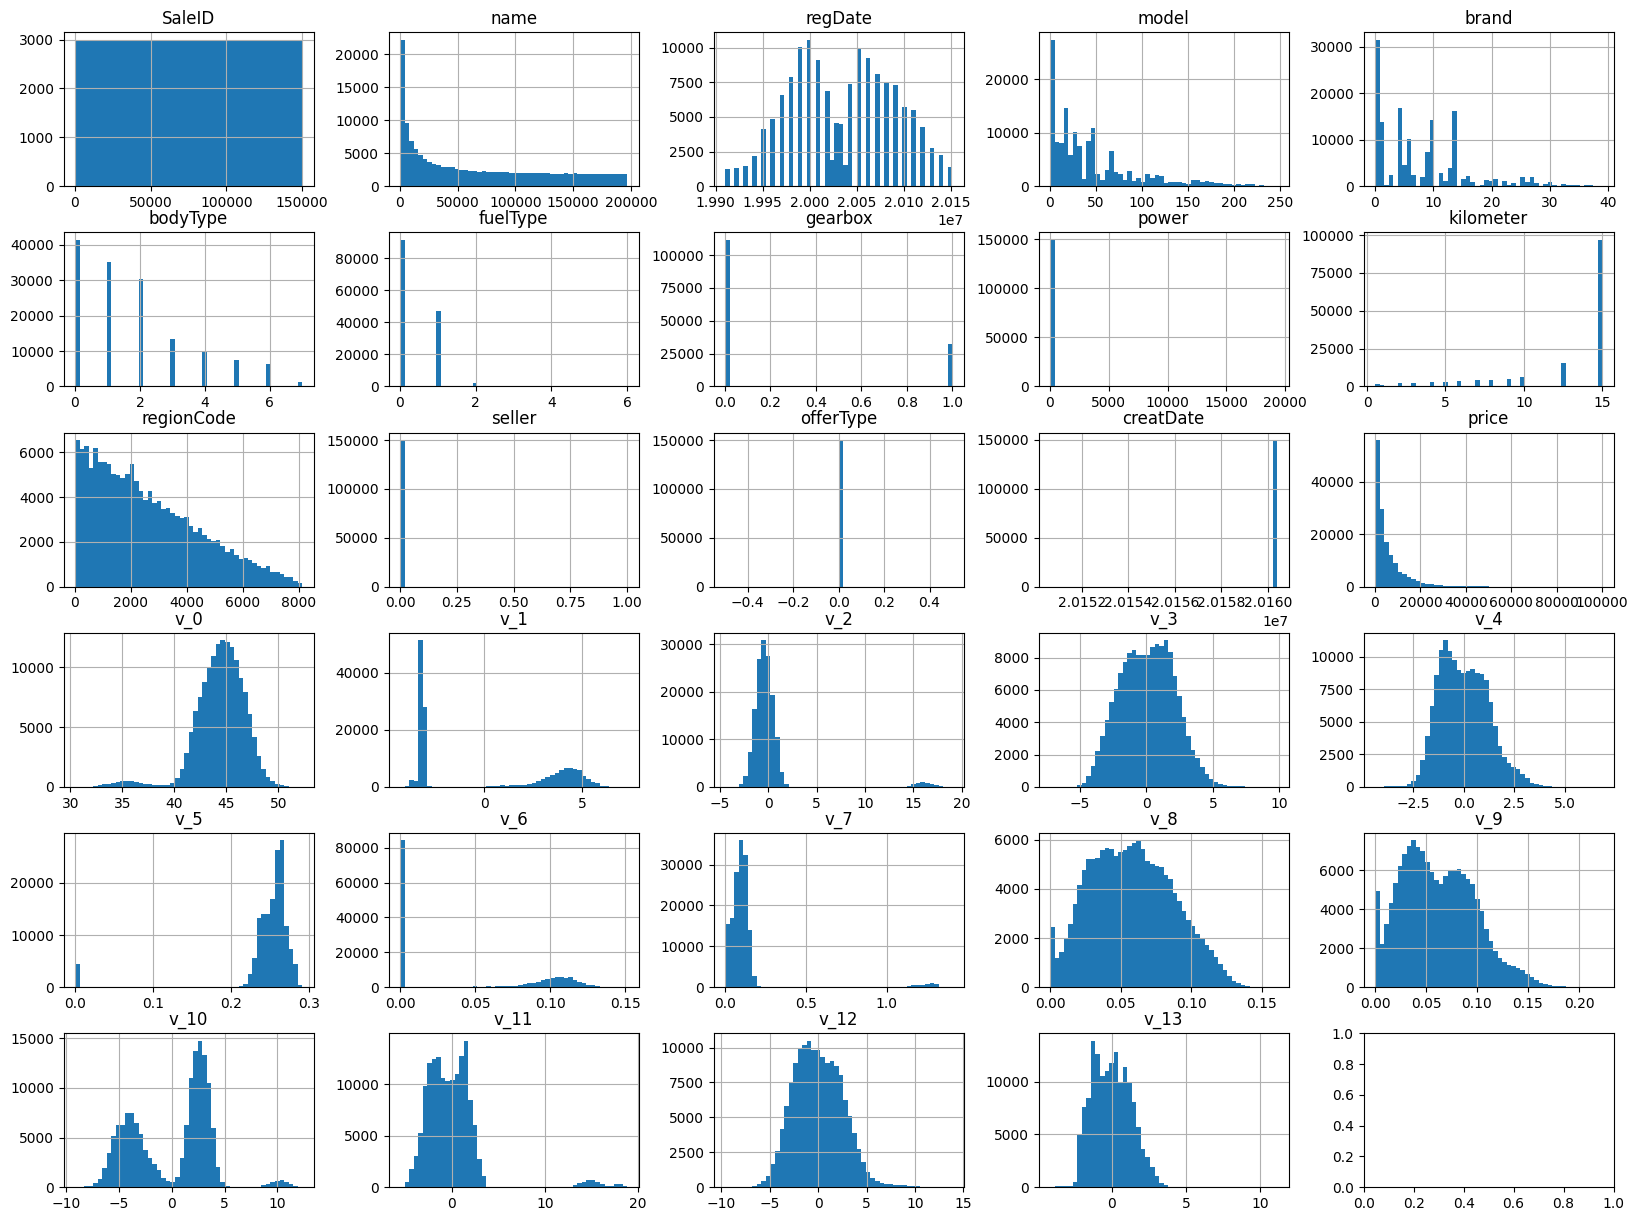

In [16]:
#绘制所有变量的柱形图，查看数据
df_train.hist(bins=50,figsize=(20,15))
plt.cla()  #清除axes

In [17]:
#查看训练集中offerType变量
df_train['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

In [18]:
#查看训练集seller变量
df_train['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [19]:
#获得需要的列名
numeric_columns=df_train.select_dtypes(exclude='object').columns
columns=[col for col in numeric_columns if col not in ['SaleID', 'name', 'regDate',
                                         'regionCode','seller', 'offerType', 'creatDate']]
#根据列名提取数据
train_set=df_train[columns]
#计算各列于交易价格的相关性
corr_matrix=train_set.corr()
corr_matrix['price'].sort_values()

v_3         -0.730946
kilometer   -0.440519
v_11        -0.275320
v_10        -0.246175
v_9         -0.206205
v_4         -0.147085
v_7         -0.053024
brand       -0.043799
v_13        -0.013993
v_14         0.035911
v_1          0.060914
v_6          0.068970
v_2          0.085322
model        0.136983
v_5          0.164317
fuelType     0.200536
power        0.219834
bodyType     0.241303
gearbox      0.329075
v_0          0.628397
v_8          0.685798
v_12         0.692823
price        1.000000
Name: price, dtype: float64

In [20]:
len(df_train['model'].unique())

249

In [21]:
len(df_train['brand'].unique())   

40

In [22]:
len(df_train['bodyType'].unique()) 

9

In [23]:
len(df_train['fuelType'].unique())

8

In [24]:
#将nan填充为-1
df_train=df_train.fillna(-1)

In [25]:
#获得model所有属性值，除nan
model_list=[model for model in list(df_train['model'].unique()) if model != -1]

In [26]:
#将所有的属性值切分出来，用1和0表示是否属于该属性，并保留nan值
all_info={}
for n in range(len(model_list)):
    print(n)
    info=[]
    for i in range(len(df_train['model'])):
        if df_train['model'][i]==model_list[n]:
            info.append(1)
        elif df_train['model'][i]==-1:
            info.append(np.nan)
        else:
            info.append(0)
    all_info['model'+str(model_list[n])]=info

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247


In [19]:
#将切分出来的属性保存为csv文件
df_info=pd.DataFrame(all_info)
df_info.to_csv('data/model.csv',encoding='utf_8_sig')

In [20]:
#获得除nan外的所有属性值列表
brand_list=[brand for brand in list(df_train['brand'].unique()) if brand != -1]
body_list=[bodyType for bodyType in list(df_train['bodyType'].unique()) if bodyType != -1]
fuel_list=[fuelType for fuelType in list(df_train['fuelType'].unique()) if fuelType != -1]

In [21]:
#将brand所有的属性值切分出来，用1和0表示是否属于该属性，并保留nan值
all_info={}
for n in range(len(brand_list)):
    print(n)
    info=[]
    for i in range(len(df_train['brand'])):
        if df_train['brand'][i]==brand_list[n]:
            info.append(1)
        elif df_train['brand'][i]==-1:
            info.append(np.nan)
        else:
            info.append(0)
    all_info['brand'+str(brand_list[n])]=info

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [22]:
#将bodyType所有的属性值切分出来，用1和0表示是否属于该属性，并保留nan值
for n in range(len(body_list)):
    print(n)
    info=[]
    for i in range(len(df_train['bodyType'])):
        if df_train['bodyType'][i]==body_list[n]:
            info.append(1)
        elif df_train['bodyType'][i]==-1:
            info.append(np.nan)
        else:
            info.append(0)
    all_info['bodyType'+str(body_list[n])]=info

0
1
2
3
4
5
6
7


In [23]:
#将fuelType所有的属性值切分出来，用1和0表示是否属于该属性，并保留nan值
for n in range(len(fuel_list)):
    print(n)
    info=[]
    for i in range(len(df_train['fuelType'])):
        if df_train['fuelType'][i]==fuel_list[n]:
            info.append(1)
        elif df_train['fuelType'][i]==-1:
            info.append(np.nan)
        else:
            info.append(0)
    all_info['fuelType'+str(fuel_list[n])]=info

0
1
2
3
4
5
6


In [24]:
#将brand、bodyType和fuelType的结果输出为csv文件
df_info=pd.DataFrame(all_info)
df_info.to_csv('data/brand_body_fuel.csv',encoding='utf_8_sig')

In [27]:
#处理字符串属性的列
new_col=[]
for n in range(len(df_train['notRepairedDamage'])):
    try:
        new_col.append(int(float(df_train['notRepairedDamage'][n])))
    except:
        new_col.append(np.nan)
df_train['notRepairedDamage_new']=new_col

In [28]:
#构建使用时间
df_train['used_time'] = (pd.to_datetime(df_train['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(df_train['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [29]:
#导入构建的变量数据
df_model_data=pd.read_csv('data/model.csv')
df_other_data=pd.read_csv('data/brand_body_fuel.csv')

In [30]:
#加入交易价格一列
df_model=df_model_data.copy()
df_other=df_other_data.copy()
df_model['price']=df_train['price']
df_other['price']=df_train['price']
#去掉空值行，以计算相关系数
df_model.dropna(inplace=True)
df_other.dropna(inplace=True)

In [31]:
#计算相关系数
cor=[]
variable=[]
for column in df_model.columns:
    cor.append(np.corrcoef(df_model[column],df_model['price'])[0,1])
    variable.append(column)
for column in df_other.columns:
    cor.append(np.corrcoef(df_other[column],df_other['price'])[0,1])
    variable.append(column)

In [32]:
#导出文件
info={}
info['特征']=variable
info['相关性']=cor
info_df=pd.DataFrame(info)
info_df.to_csv('data/corcoef.csv',encoding='utf_8_sig')

In [33]:
#根据相关系数帅选变量，阈值0.1
info_df=pd.read_csv('data/corcoef.csv')
df_new_var=pd.DataFrame(df_train['SaleID'])
for n in range(len(info_df['相关性'])):
    corcoef=info_df['相关性'][n]
    if np.abs(corcoef)>=0.1:
        new_variable=info_df['特征'][n]
        if new_variable in df_model_data.columns:
            df_new_var[new_variable]=df_model_data[new_variable]
        elif new_variable in df_other_data.columns:
            df_new_var[new_variable]=df_other_data[new_variable]

In [34]:
#将未被删除的新构造的变量加入到数据中
df_train=df_train.merge(df_new_var, how='left',on='SaleID')

In [35]:
#切分特征和标签
train_set=df_train.copy()
x_train=train_set[[col for col in train_set.columns if col not in ['SaleID','name','regDate','notRepairedDamage','regionCode','creatDate',
                                                                 'price','model','bodyType','fuelType','gearbox','brand']]]
y_train=train_set['price']

In [36]:
import lightgbm as lgb
import gc
from sklearn.model_selection import train_test_split
callbacks = [
    lgb.callback.early_stopping(stopping_rounds=100),
]
features = pd.get_dummies(x_train)
feature_names = list(features.columns)
features = np.array(features)
labels = np.array(y_train).reshape((-1, ))
feature_importance_values = np.zeros(len(feature_names))
task='regression'
early_stopping=True
eval_metric= 'l2'
n_iterations=10
for _ in range(n_iterations):
    if task == 'classification':
        model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)
    elif task == 'regression':
        model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)
    else:
        raise ValueError('Task must be either "classification" or "regression"')
 # If training using early stopping need a validation set
    if early_stopping:
        train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)
  # Train the model with early stopping
        model.fit(train_features, train_labels, eval_metric = eval_metric,eval_set = [(valid_features, valid_labels)],callbacks=callbacks)
        gc.enable()
        del train_features, train_labels, valid_features, valid_labels
        gc.collect()
  
    else:
        model.fit(features, labels)
   # Record the feature importances
    feature_importance_values += model.feature_importances_ / n_iterations
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        

        

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[990]	valid_0's l2: 1.61183e+06
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.51707e+06
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.67293e+06
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.59136e+06
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's l2: 1.53349e+06
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.63336e+06
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.48832e+06
T

In [37]:
#按照重要性大小对特征进行排序
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)
#计算特征的相对重要性，全部特征的相对重要性之和为1
feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
#计算特征的累计重要性
feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])
#选取累计重要性大于0.99的特征，这些特征将会被删除掉。
drop_columns=list(feature_importances.query('cumulative_importance>0.99')['feature'])

In [38]:
#去掉重要度低的列
x_set=x_train.copy()
x_set.drop(drop_columns,axis=1,inplace=True)
#对数据集总体概览
x_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   power                  150000 non-null  int64  
 1   kilometer              150000 non-null  float64
 2   v_0                    150000 non-null  float64
 3   v_1                    150000 non-null  float64
 4   v_2                    150000 non-null  float64
 5   v_3                    150000 non-null  float64
 6   v_4                    150000 non-null  float64
 7   v_5                    150000 non-null  float64
 8   v_6                    150000 non-null  float64
 9   v_7                    150000 non-null  float64
 10  v_8                    150000 non-null  float64
 11  v_9                    150000 non-null  float64
 12  v_10                   150000 non-null  float64
 13  v_11                   150000 non-null  float64
 14  v_12                   150000 non-nu

In [39]:
x_set.fillna(1,inplace=True)

In [40]:
feature_importances

,feature,importance,normalized_importance,cumulative_importance
0,used_time,3329.6,0.111142,0.111142
1,power,2252.7,0.075195,0.186338
2,v_14,2080.2,0.069437,0.255775
3,v_6,1800.7,0.060107,0.315882
4,v_0,1758.9,0.058712,0.374594
5,v_1,1706.2,0.056953,0.431547
6,v_3,1673.0,0.055845,0.487392
7,v_13,1509.4,0.050384,0.537776
8,v_10,1507.6,0.050324,0.588100
9,v_8,1408.3,0.047009,0.635109


In [78]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_set,y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_goodness(model,x,y):
    prediction=model.predict(x)
    mae=mean_absolute_error(y,prediction)
    mse=mean_squared_error(y,prediction)
    rmse=np.sqrt(mse)
    print('MAE:',mae)
    print('MSE:',mse)
    print('RMSE:',rmse)

In [42]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
        print("Scores:", scores)    
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

In [81]:
model_goodness(lin_reg,x_set,y_train)

MAE: 2639.8150492325844
MSE: 18017630.396554623
RMSE: 4244.717940753499


In [83]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(x_set,y_train)

RandomForestRegressor()

In [2]:
scores=cross_val_score(forest_reg,x_set,y_train,scoring='neg_mean_absolute_error',cv=10)
mae_scores=np.abs(-scores)
display_scores(mae_scores)

Scores: [652.15161169 654.81136613 648.09619905 657.49664528 673.97678794
  654.27650101 645.71378005 657.2867583 651.22251178 663.66252653]
Mean: 655.8694687743387
Standard deviation: 7.719447540514956


In [85]:
model_goodness(forest_reg,x_set,y_train)

MAE: 226.78285354344155
MSE: 276668.74495860166
RMSE: 525.9931035276048


In [87]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor()
gbrt.fit(x_set,y_train)

GradientBoostingRegressor()

In [88]:
model_goodness(gbrt,x_set,y_train)

MAE: 857.575088017167
MSE: 2456153.8183181663
RMSE: 1567.2121165681965


In [3]:
scores=cross_val_score(gbrt,x_set,y_train,scoring='neg_mean_absolute_error',cv=10)
mae_scores=np.abs(scores)
display_scores(mae_scores)

Scores: [871.07783816 876.63340014 870.47687547 872.4287888 895.86320656
  871.6038085 878.85141976 867.0292932 885.38244894 894.75893534]
Mean: 878.4106014883986
Standard deviation: 9.757986393560664


In [ ]:
import lightgbm as lgb
import xgboost as xgb
xgb_reg= xgb.XGBRegressor()
xgb_reg.fit(x_set,y_train)

In [91]:
model_goodness(xgb_reg,x_set,y_train)

MAE: 558.6402173237409
MSE: 970443.1096450491
RMSE: 985.1107093342602


In [4]:
scores=cross_val_score(xgb_reg,x_set,y_train,scoring='neg_mean_absolute_error',cv=10)
mae_scores=np.abs(scores)
display_scores(mae_scores)

Scores: [655.15083501 668.46696184 657.99030384 663.72877291 674.4862969
  672.26708931 649.44782756 661.52237656 660.94324421 671.20269404]
Mean: 663.5206402180569
Standard deviation: 7.678461495564534


In [99]:
lgb_reg=lgb.LGBMRegressor()
lgb_reg.fit(x_set,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4363
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 25
[LightGBM] [Info] Start training from score 5923.327333


LGBMRegressor()

In [100]:
model_goodness(lgb_reg,x_set,y_train)

MAE: 679.4374051062459
MSE: 1563076.3760486105
RMSE: 1250.2305291619664


In [130]:
scores=cross_val_score(lgb_reg,x_set,y_train,scoring='neg_mean_absolute_error',cv=10)
mae_scores=np.abs(scores)
display_scores(mae_scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4363
[LightGBM] [Info] Number of data points in the train set: 135000, number of used features: 25
[LightGBM] [Info] Start training from score 5925.049659
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4363
[LightGBM] [Info] Number of data points in the train set: 135000, number of used features: 25
[LightGBM] [Info] Start training from score 5915.902378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4363
[LightGBM] [Info] Number of data points in the train set: 135000, number of used features: 25
[LightGBM] [Info] 

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#2.设置参数空间
from hyperopt import hp
space_forest = {
    'bootstrap':[True,False],
    'max_features':list(range(0,25,1)),
    'max_depth': list(range(0, 100, 1)),
    'n_estimators': list(range(30, 150, 1))
}

In [57]:
#随机搜索，利用5折交叉验证得分来作为模型优劣的判断标准
forest_reg=RandomForestRegressor()
random_search=RandomizedSearchCV(forest_reg, space_forest,cv=5,scoring='neg_mean_squared_error')

In [72]:
#得到最优参数
random_search.best_params__

{'n_estimators': 73, 'max_features': 11, 'max_depth': 33, 'bootstrap': False}


In [64]:
#2.定义参数空间
from hyperopt import hp
space = {
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'max_depth': hp.quniform('max_depth', 0, 100, 1),
    'n_estimators': hp.quniform('n_estimators', 30, 150, 1)
}

In [50]:
#定义优化函数，即为5折交叉验证的得分
from sklearn.model_selection import cross_val_score
def objective(params, n_folds=5):
    num_leaf=int(params['num_leaves'])
    estimator=int(params['n_estimators'])
    rate=params['learning_rate']
    sub_for_bin=int(params['subsample_for_bin'])
    max_dep=int(params['max_depth'])
    lgb_reg=lgb.LGBMRegressor(num_leaves=num_leaf,n_estimators = estimator,learning_rate=rate,subsample_for_bin=sub_for_bin,max_depth=max_dep)
    lgb_reg.fit(x_set,y_train)
    scores=cross_val_score(lgb_reg,x_set,y_train,scoring='neg_mean_absolute_error',cv=5)
    mae_scores=np.abs(scores)
    loss=mae_scores.mean()
    return loss


In [51]:
#寻找到使优化函数最小超参数组合，利用hyperopt中的fmin来求最小化
from hyperopt import Trials,fmin,tpe
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 500)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021966 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002851 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26       

[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003309 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003794 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365   

[LightGBM] [Info] Total Bins 4364                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003451 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4364                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing col-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003403 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003492 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003310 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365   

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002713 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4364                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.   
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004410 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4340   

[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004069 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003418 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365   

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002771 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing col-wi

[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004505 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003643 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003138 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004115 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003495 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004386 seconds.                
You can set `force_row_wise=true` to r

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004138 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] 

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003357 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4364                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4348                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.   
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003668 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4349                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from 

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028850 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004335 seconds

[LightGBM] [Info] Total Bins 4363                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003321 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4361                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003474 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4360                                                                                      
[LightGBM] [Info] Number of data poi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024235 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003447 seconds

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003807 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004445 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003487 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing col-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003237 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002754 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002939 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025178 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26       

[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003697 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024196 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4365                                                                   

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003529 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing col-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5916.911875                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003095 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5933.848725                                                                
[LightGBM] [Info] Auto-choosing col-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003591 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4364                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032619 seconds.                
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003815 seconds

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5908.356550                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003437 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5927.457700                                                                
[LightGBM] [Info] Auto-choosing row-wi

[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 120000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5930.061817                                                                
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003257 seconds.                
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4365                                                                                      
[LightGBM] [Info] Number of data points in the train set: 150000, number of used features: 26                          
[LightGBM] [Info] Start training from score 5923.327333                                                                
[LightGBM] [Warning] No further splits

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024757 seconds.                
You can set `force_col_wise=true` to rem

In [5]:
loss

576.4144808492749


In [56]:
best

{'learning_rate': 0.11840247341423178,
 'max_depth': 14.0,
 'n_estimators': 150.0,
 'num_leaves': 148.0,
 'subsample_for_bin': 120000.0}

In [120]:
#构造调优后的模型
forest_reg=RandomForestRegressor(n_estimators=73, max_features= 11, max_depth=33,bootstrap=False)
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.8400547784951151,gamma=0.24562245606367,learning_rate=0.07356238705262594,max_depth=13,n_estimators=135)
lgb_reg=lgb.LGBMRegressor(learning_rate=0.1281370851088587,max_depth=24,n_estimators=148,num_leaves=146,subsample_for_bin=200000)

In [121]:
#将训练集切分出验证集
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
x_tr,x_val,y_tr,y_val = train_test_split(x_set,y_train,test_size=0.3)

In [122]:
#模型训练
forest_reg.fit(x_tr,y_tr)
xgb_reg.fit(x_tr,y_tr)
lgb_reg.fit(x_tr,y_tr)

In [123]:
#用验证集进行预测
forest_pre=forest_reg.predict(x_val)
xgb_pre=xgb_reg.predict(x_val)
lgb_pre=lgb_reg.predict(x_val)

In [129]:
#输出预测结果的MAE
MAE_forest=mean_absolute_error(forest_pre,y_val)
MAE_xgb=mean_absolute_error(xgb_pre,y_val)
MAE_lgb=mean_absolute_error(lgb_pre,y_val)
print('MAE for RandomForest:',MAE_forest)
print('MAE for xgb:',MAE_xgb)
print('MAE for lgb:',MAE_lgb)

MAE for RandomForest: 615.0966636332342
MAE for xgb: 587.2642778078476
MAE for lgb: 595.05162986134


In [125]:
#采用加权融合模型
val_Weighted = (1-2*MAE_lgb/(MAE_xgb+MAE_lgb+MAE_forest))*lgb_pre+(1-2*MAE_xgb/(MAE_xgb+MAE_lgb+MAE_forest))*xgb_pre+(1-2*MAE_forest/(MAE_xgb+MAE_lgb+MAE_forest))*forest_pre

In [128]:
print('MAE for val_Weighted:', mean_absolute_error(val_Weighted, y_val))

MAE for val_Weighted: 569.7565852828151
